In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np



In [ ]:
trdata= ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='/content/drive/MyDrive/Major Project <Sandip Roy>/train',target_size=(224,224))
tsdata= ImageDataGenerator()
testndata = tsdata.flow_from_directory(directory='/content/drive/MyDrive/Major Project <Sandip Roy>/test',target_size=(224,224))



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
VGG =VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG.trainable=False

In [ ]:
model=keras.Sequential([
                        VGG,
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=256,activation="relu"),
                        keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=2,activation="softmax")

])

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
hist=model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data=testndata,validation_steps=10,epochs=10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
20/20 [==============================] - 203s 9s/step - loss: 3.4006 - accuracy: 0.7047 - val_loss: 1.2293 - val_accuracy: 0.7625
Epoch 2/10
20/20 [==============================] - 115s 6s/step - loss: 0.9392 - accuracy: 0.8078 - val_loss: 1.2034 - val_accuracy: 0.7156
Epoch 3/10
20/20 [==============================] - 86s 4s/step - loss: 0.9768 - accuracy: 0.8035 - val_loss: 1.0190 - val_accuracy: 0.8156
Epoch 4/10
20/20 [==============================] - 50s 2s/step - loss: 0.7292 - accuracy: 0.8562 - val_loss: 0.5277 - val_accuracy: 0.8281
Epoch 5/10
20/20 [==============================] - 41s 2s/step - loss: 0.3321 - accuracy: 0.8766 - val_loss: 0.3899 - val_accuracy: 0.8500
Epoch 6/10
20/20 [==============================] - 24s 1s/step - loss: 0.2535 - accuracy: 0.9234 - val_loss: 0.5091 - val_accuracy: 0.8562
Epoch 7/10
20/20 [==============================] - 20s 907ms/step - loss: 0.2110 - accuracy: 0.9163 - val_loss: 0.6839 - val_accuracy: 0.8188
Epoch 8/10
20/2

In [ ]:
model.save("imageclassify.hdf5")

In [ ]:
target_size = [224, 224]


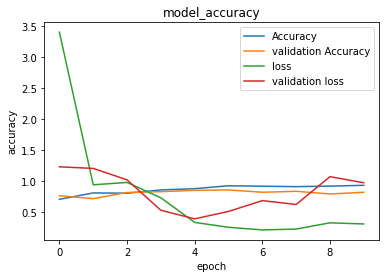

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Accuracy","validation Accuracy","loss","validation loss"])
plt.show()


In [ ]:
from keras.preprocessing import image 

[[9.9970406e-01 2.9591366e-04]]
benign


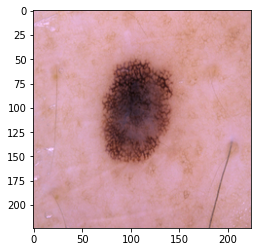

In [ ]:
img_pred = image.load_img('/content/drive/MyDrive/Major Project <Sandip Roy>/train/benign/100.jpg',target_size =(224,224))
plt.imshow(img_pred)
img_pred =image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis =0)

rslt = model.predict(img_pred)
print (rslt)
if rslt[0][0] <= 0.5:
    prediction ="malignant"
else:
    prediction = "benign"  
print(prediction)      
       


[[0.03934028 0.9606597 ]]
malignant


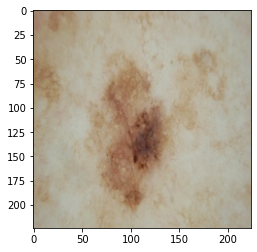

In [ ]:
img_pred = image.load_img('/content/drive/MyDrive/Major Project <Sandip Roy>/train/malignant/10.jpg',target_size =(224,224))
plt.imshow(img_pred)
img_pred =image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis =0)
rslt = model.predict(img_pred)
print (rslt)
if rslt[0][0] <= 0.5:
    prediction ="malignant"
else:
    prediction = "benign"  
print(prediction)      
       
